Scraping reviews...
Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping 

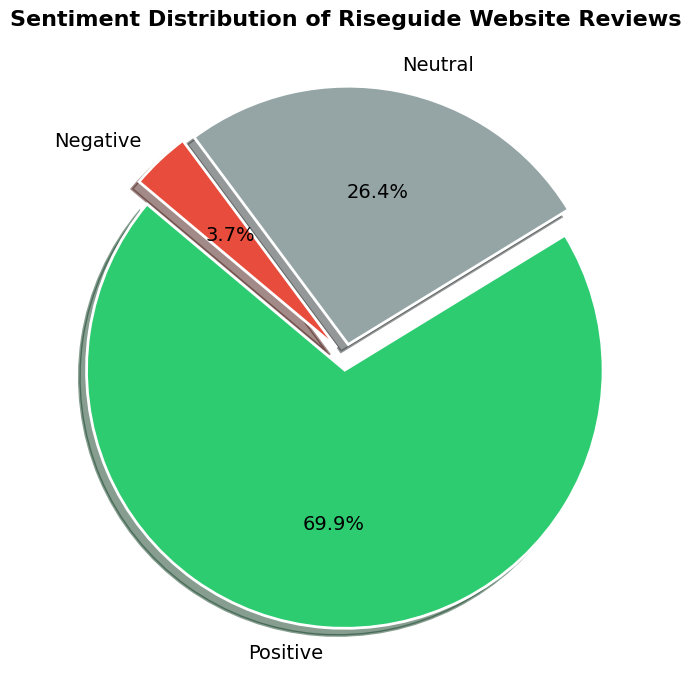

In [2]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
import time
import pandas as pd

# ========== Configuration ==========
base_url = "https://www.trustpilot.com/review/riseguide.com?page="
max_reviews = 889
all_reviews = []

# ========== Scraping ==========
page = 1
print("Scraping reviews...")

while len(all_reviews) < max_reviews:
    print(f"Scraping page {page}...")
    url = base_url + str(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')


    review_elements = soup.find_all('p', {"data-service-review-text-typography": "true"})
    if not review_elements:
        print("❌ No more reviews found.")
        break

    for review in review_elements:
        if len(all_reviews) >= max_reviews:
            break
        text = review.get_text(strip=True)
        all_reviews.append(text)

    page += 1
    time.sleep(1)

print(f"\n ✅ Total reviews scraped: {len(all_reviews)}")

# ========== Sentiment Analysis and DataFrame Creation ==========
reviews_with_sentiment = []
positive = 0
negative = 0
neutral = 0

for review in all_reviews:
    analysis = TextBlob(review)
    p = analysis.sentiment.polarity
    sentiment = ""
    if p > 0.1:
        sentiment = "Positive"
        positive += 1
    elif p < -0.1:
        sentiment = "Negative"
        negative += 1
    else:
        sentiment = "Neutral"
        neutral += 1
    reviews_with_sentiment.append({"Review": review, "Sentiment": sentiment})


df = pd.DataFrame(reviews_with_sentiment)


# ========== Save to CSV ==========
df.to_csv("riseguide_reviews.csv", index=False)
print("\n✅ Reviews with sentiment saved to riseguide_reviews.csv")


# ========== Display stats ==========

print("\n📊 Sentiment Stats:")
print(f"✅ Positive reviews: {positive}")
print(f"✅ Neutral reviews: {neutral}")
print(f"✅ Negative reviews: {negative}")

results = {"positive": positive, "neutral": neutral, "negative": negative}


# ========== Visualization ==========
plt.figure(figsize=(7, 7))
plt.pie(
    [results["positive"], results["neutral"], results["negative"]],
    labels=["Positive", "Neutral", "Negative"],
    colors=["#2ecc71", "#95a5a6", "#e74c3c"],
    autopct=lambda pct: f"{pct:.1f}%",
    explode=(0.05, 0.05, 0.05),
    shadow=True,
    startangle=140,
    textprops={'fontsize': 14, 'color': 'black'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
plt.title("Sentiment Distribution of Riseguide Website Reviews", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()